# **Clasificación Precio de Smartphones**

Dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data

## **Librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
train_df = pd.read_csv("/content/mobile-train.csv")
test_df = pd.read_csv("/content/mobile-test.csv")

In [3]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_df.duplicated().any()

False

In [5]:
train_df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [6]:
train_df.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


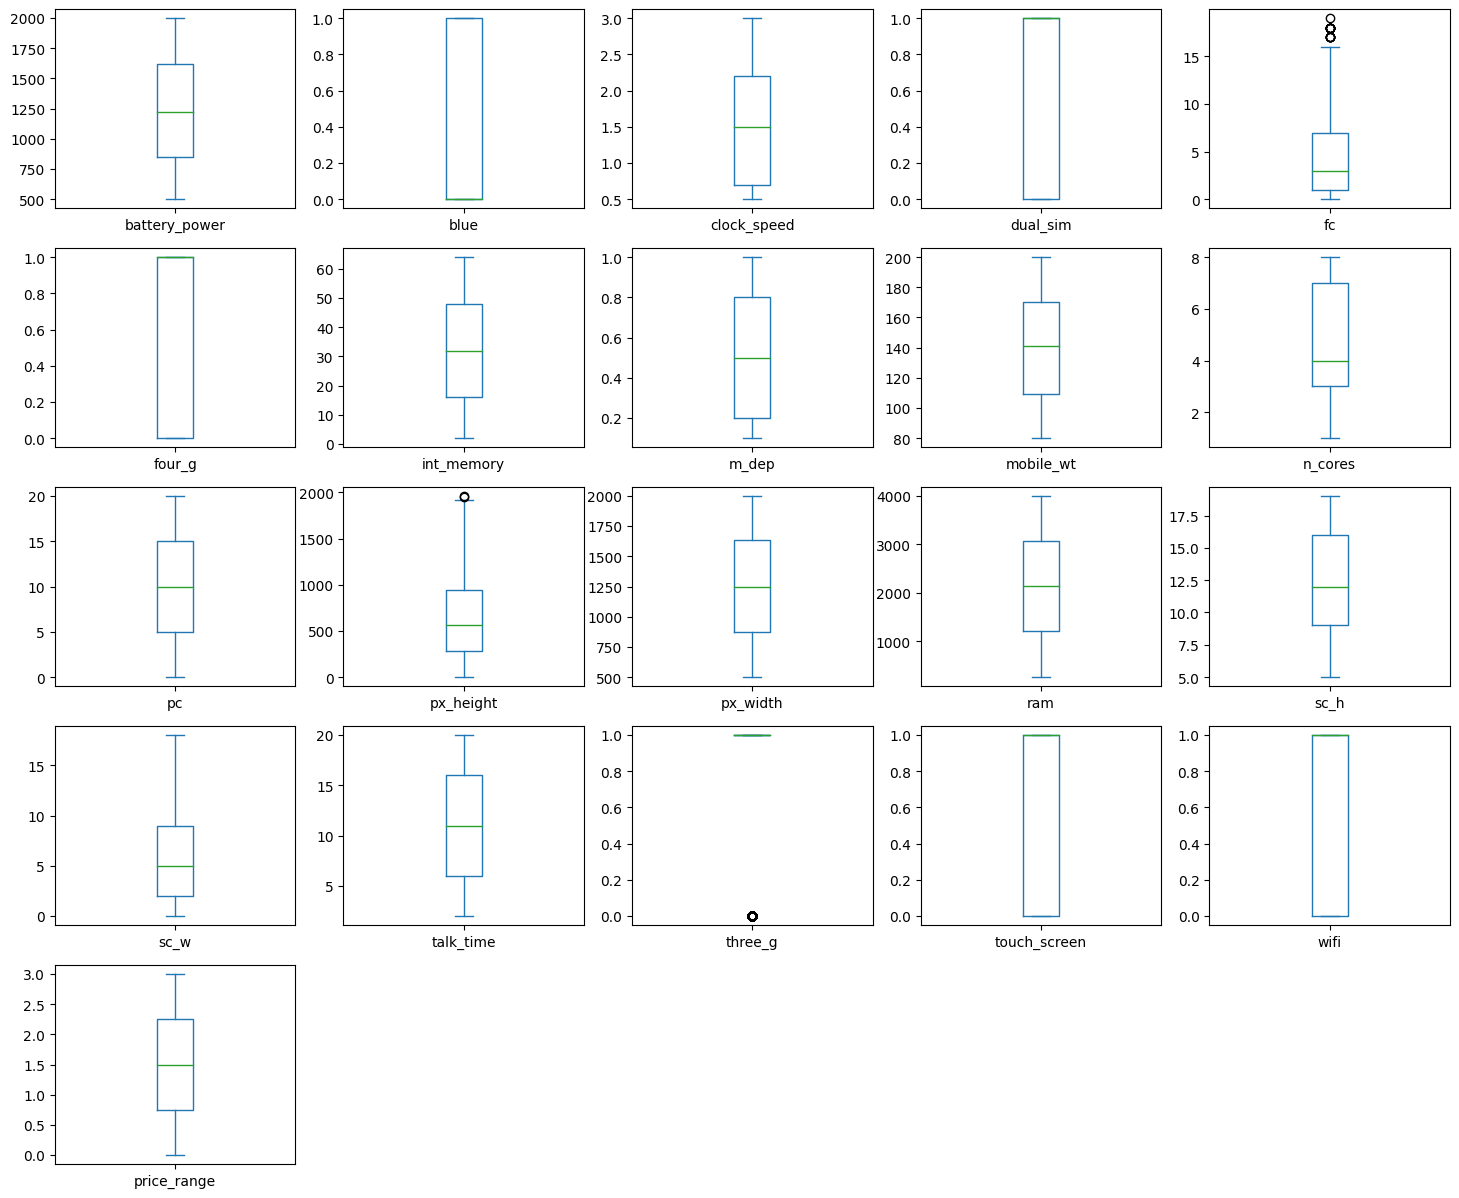

In [7]:
# drawing a box plots for all columns

train_df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

## **Removing outliers**

In [8]:
# creating a function to remove the outliers using IQR and Applying it
def removeOutliers(df, columns, factor=1.5):

    for column in columns:
        Q1 = df[column].quantile(0.25) # Lower Bound
        Q3 = df[column].quantile(0.75) # Upper Bound
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [9]:
train_df = removeOutliers(train_df, columns=["fc","px_height"])

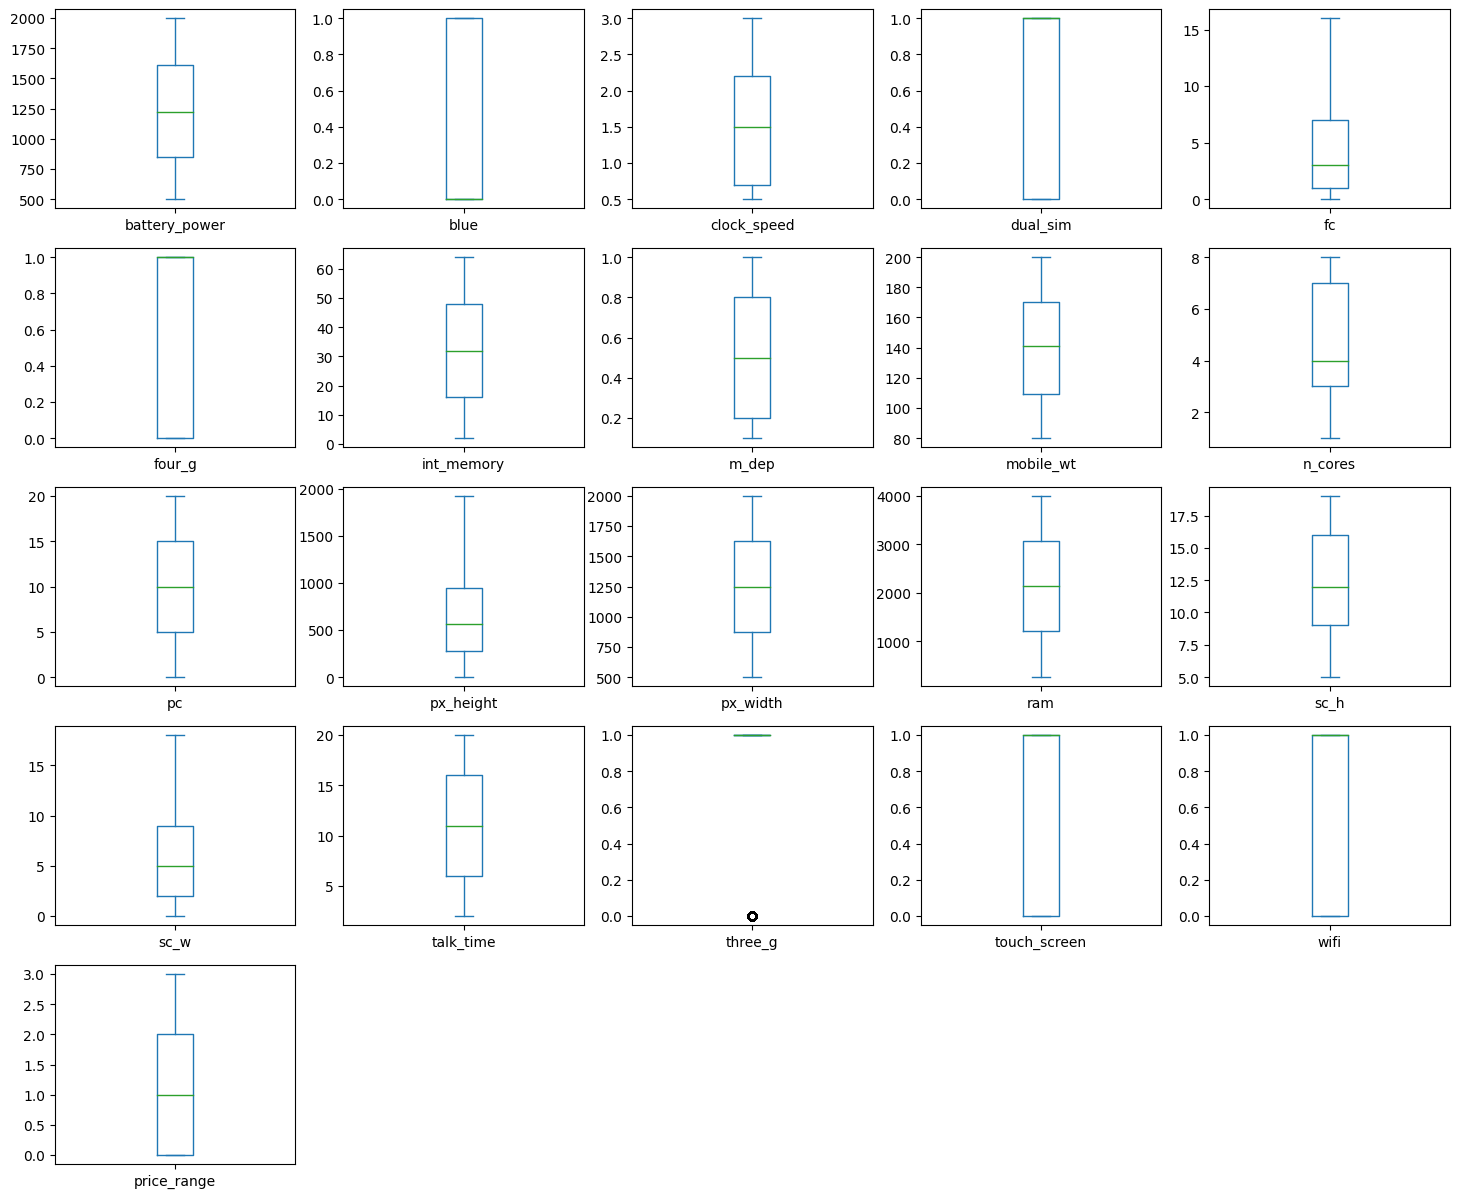

In [10]:
train_df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [11]:
test_df = removeOutliers(train_df, columns=["fc","px_height"])

In [12]:
train_df.price_range.value_counts()

,count
price_range,
2,496
0,496
1,495
3,493


**Price range**

* Clase 0: below 1000\$
* Clase 1: below 2000\$
* Clase 2: below 3000\$
* Clase 3: below 4000\$

In [13]:
Rango_precio = {'0': 'Below 1000$',
                '1': 'Below 2000$',
                '2': 'Below 3000$',
                '3': 'Below 4000$',}

In [ ]:
#train_df["price_range"] = train_df["price_range"].replace([0,1,2,3],["below 1000$","below 2000$", "below 3000$", "below 4000$"])

In [14]:
train_df["blue"] = train_df["blue"].replace([0,1],["No","Yes"])

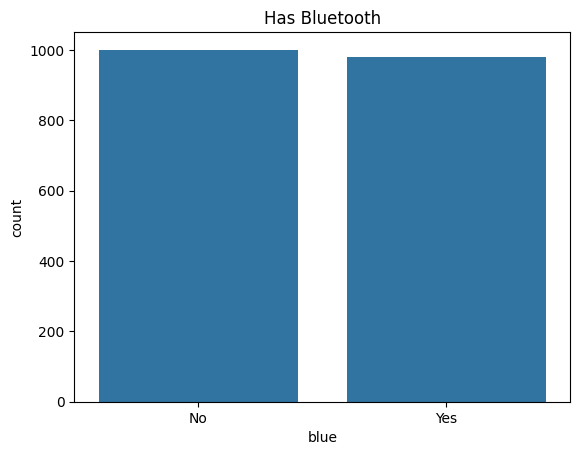

In [15]:
sns.countplot(x= "blue", data=train_df)
plt.title("Has Bluetooth")
plt.show()

<Axes: title={'center': 'Range of Battery Power'}, xlabel='battery_power', ylabel='Count'>

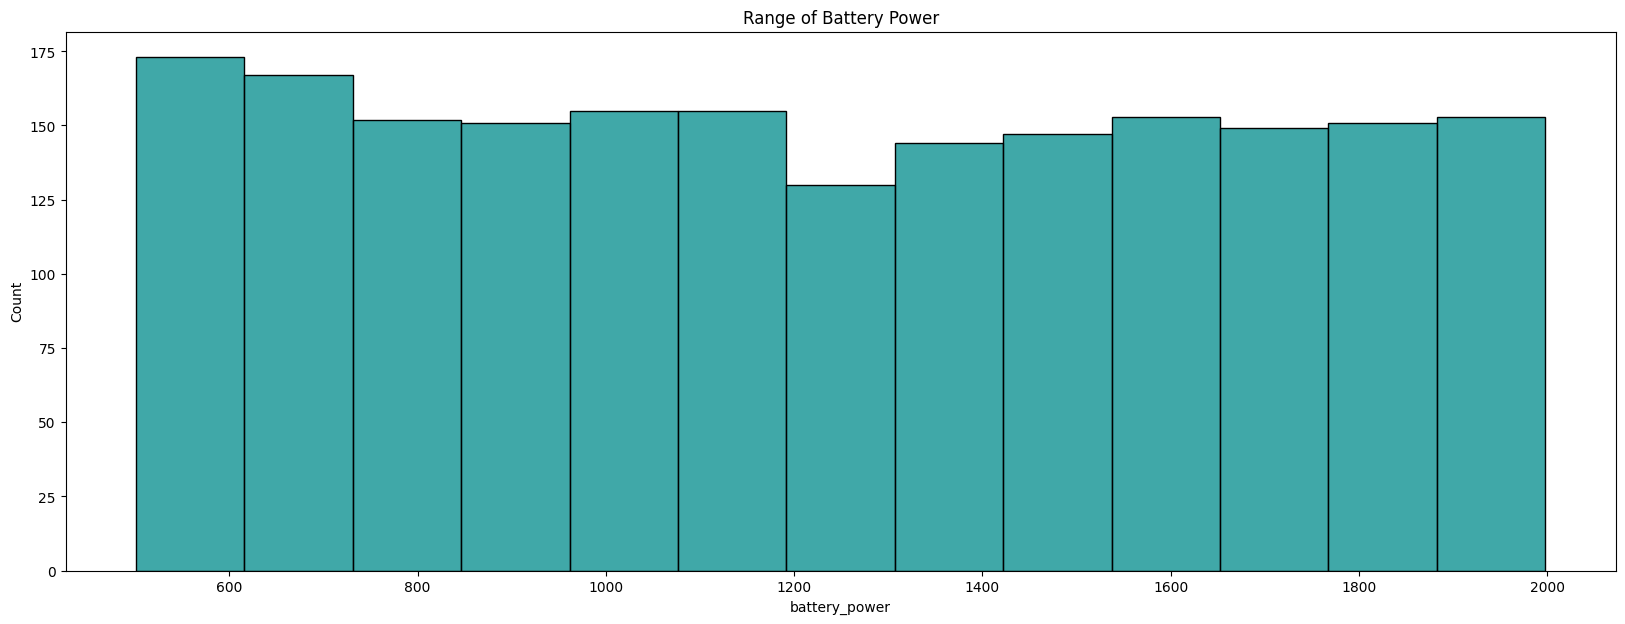

In [16]:
plt.subplots(figsize=(20, 7))
plt.title("Range of Battery Power")
sns.histplot(data=train_df, x=train_df["battery_power"],color= "darkcyan")

<ipython-input-17-d291238cc6b4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.talk_time, shade = True, color = "b")


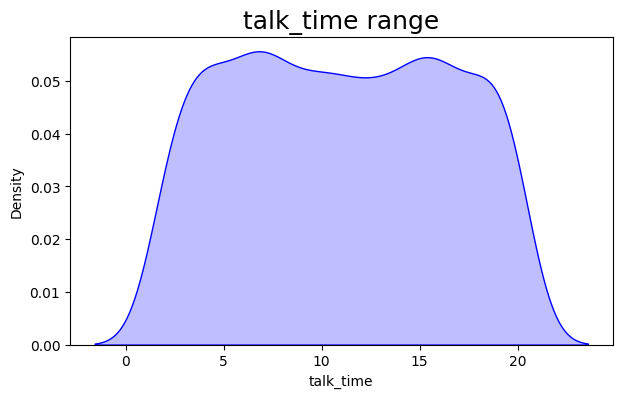

In [17]:
plt.figure(figsize = (7,4))
sns.kdeplot(train_df.talk_time, shade = True, color = "b")
plt.title("talk_time range", fontsize = 18)
plt.show()

In [18]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,Yes,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,Yes,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,Yes,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,Yes,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [19]:
train_df["blue"] = train_df["blue"].replace(['No','Yes'],[0,1])

In [20]:
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [21]:
X = train_df.drop('price_range', axis=1)  # Features
y = train_df['price_range']  # Target

In [22]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
np.shape(X_train)

(1584, 20)

## **Arquitectura Neuronal**

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32,input_dim=20, activation="sigmoid"))
model.add(tf.keras.layers.Dense(64,activation="sigmoid"))
model.add(tf.keras.layers.Dense(32,activation="sigmoid"))
model.add(tf.keras.layers.Dense(4,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

loss, accuracy = model.evaluate(X_test,y_test)
print("Test Accuracy: ", accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2652 - loss: 1.3951
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5455 - loss: 1.1310
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8309 - loss: 0.6389
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9014 - loss: 0.4346
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9426 - loss: 0.2924
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.2188
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9576 - loss: 0.1719
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9695 - loss: 0.1398
Epoch 9/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9637 - loss: 0.1232
Epoch 10/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9593 - loss: 0.1114
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.0926  
Test Accuracy:  0.9545454382896423


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,990 (58.56 KB)

 Trainable params: 4,996 (19.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,994 (39.04 KB)

## **Evaluando el modelo**

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


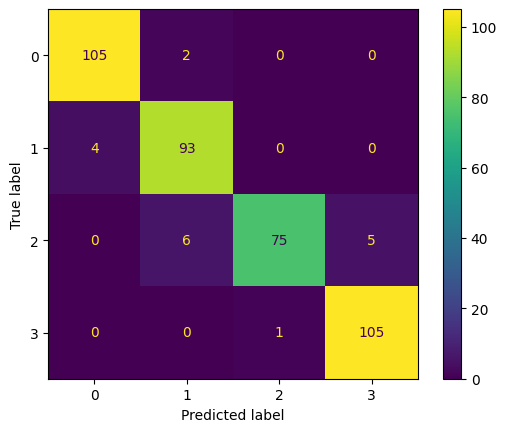

In [27]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.92      0.96      0.94        97
           2       0.99      0.87      0.93        86
           3       0.95      0.99      0.97       106

    accuracy                           0.95       396
   macro avg       0.96      0.95      0.95       396
weighted avg       0.96      0.95      0.95       396



## **Predicciones**

In [29]:
X_train[0]

array([ 1.2044073 , -1.00126342, -0.15909866,  0.99621927,  0.21251632,
       -1.03207996,  1.70327651,  1.02515778, -0.38461017,  1.50212531,
        1.54764721,  1.67536968,  0.31458264, -0.07947148,  1.57629326,
        1.41825367,  0.91617037, -1.78929917,  0.99120033, -1.02428469])

In [33]:
vector_prueba = {"battery_power": 842,
           "blue": 0,
           "clock_speed": 2.2,
           "dual_sim": 0,
           "fc": 1,
           "four_g": 0,
           "int_memory": 7,
           "m_dep": 0.6,
           "mobile_wt": 188,
           "n_cores": 2,
           "pc": 2,
           "px_height": 20,
           "px_width": 756,
           "ram": 2549,
           "sc_h": 9,
           "sc_w": 7,
           "talk_time": 19,
           "three_g": 0,
           "touch_screen": 0,
           "wifi": 1}

In [34]:
vector_prueba = pd.DataFrame([vector_prueba])
vector_prueba

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1


In [35]:
X_test = scaler.transform(vector_prueba)

In [36]:
Prediccion = model.predict(vector_prueba)

print("\n La muestra pertenece a la clase: ", np.argmax(Prediccion), "con una probabilidad de: ", np.max(Prediccion)*100, "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

 La muestra pertenece a la clase:  3 con una probabilidad de:  99.6145486831665 %
